# Лабораторная работа №6, вариант 10

### Цель работы: научиться решать задачу классификации методами решающих деревьев и ансамблей на их основе.

#### Вариант 10 – Баскетбол 


Датасет – nba.csv 

В качестве набора данных используется статистика новичков НБА для прогнозирования того, продержится ли игрок пять лет в лиге. Анализ полезен в работе надстратегиями команд и игроками.

**Атрибуты:**
- Name – имя игрока
- GP (Games Played) – общее количество игр, в которых игрок принимал участие
- MIN (Minutes) – общее количество минут, проведенных игроком на площадке
- PTS (Points) – общее количество очков, набранных игроком в течение карьеры
или в определенном сезоне
- FGM (Field Goals Made) – количество успешно заброшенных мячей
- FGA (Field Goals Attempted) – количество всех выполненных бросков
- FG% (Field Goal Percentage) – процент реализованных бросков в атаке
- 3Р Made – количество успешных трехочковых бросков
- 3РА (Three-Point Attempts) – количество попыток трехочковых бросков, показывающее, как часто игрок пытается забросить с дальней дистанции
- 3Р% (Three-Point Percentage) – процент реализации трехочковых бросков
- FTM (Free Throws Made) – количество успешно заброшенных штрафных бросков
- FTA (Free Throws Attempted) – количество попыток штрафных бросков
- FT% (Free Throw Percentage) – процентное соотношение между результатив-
ными штрафными бросками и общим количеством штрафных
бросков
- OREB (Offensive Rebounds) – количество выигранных подборов под корзиной
соперника
- DREB (Defensive Rebounds) – количество выигранных подборов под своей
корзиной
- REB (Total Rebounds) – общее количество подборов (как атакующих, так и обо-
ронительных)
- AST (Assists) – количество передач, после которых был выполнен
результативный бросок
- STL (Steals) – количество удачных перехватов мяча
- BLK (Blocks) – количество удачно выполненных блоков
- TOV (Turnovers) – количество потерянных мячей
- Target_5Yrs – целевая переменная (0 или 1)

**1. Импортируйте необходимые библиотеки**

In [55]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV  
from sklearn.tree import DecisionTreeClassifier, plot_tree  
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay  

**2. Ззагружаем данные и проводим первичный анализ данных**

In [56]:
df = pd.read_csv('nba.csv')
df = df.drop('Name',axis=1) #Удалим столбец с именами, т.к. он загрязняет данные.
X = df.drop(columns=['TARGET_5Yrs'])
y = df['TARGET_5Yrs']
print("Размерность признаков:", X.shape)
print("Названия признаков:", X.columns.tolist())
print("Размерность целевой переменной:", y.shape)
print("Уникальные классы:", y.unique())
print("\nПервые 5 строк признаков:")
print(X.head())

Размерность признаков: (1340, 19)
Названия признаков: ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV']
Размерность целевой переменной: (1340,)
Уникальные классы: [0 1]

Первые 5 строк признаков:
   GP   MIN  PTS  FGM  FGA   FG%  3P Made  3PA   3P%  FTM  FTA   FT%  OREB  \
0  36  27.4  7.4  2.6  7.6  34.7      0.5  2.1  25.0  1.6  2.3  69.9   0.7   
1  35  26.9  7.2  2.0  6.7  29.6      0.7  2.8  23.5  2.6  3.4  76.5   0.5   
2  74  15.3  5.2  2.0  4.7  42.2      0.4  1.7  24.4  0.9  1.3  67.0   0.5   
3  58  11.6  5.7  2.3  5.5  42.6      0.1  0.5  22.6  0.9  1.3  68.9   1.0   
4  48  11.5  4.5  1.6  3.0  52.4      0.0  0.1   0.0  1.3  1.9  67.4   1.0   

   DREB  REB  AST  STL  BLK  TOV  
0   3.4  4.1  1.9  0.4  0.4  1.3  
1   2.0  2.4  3.7  1.1  0.5  1.6  
2   1.7  2.2  1.0  0.5  0.3  1.0  
3   0.9  1.9  0.8  0.6  0.1  1.0  
4   1.5  2.5  0.3  0.3  0.4  0.8  


Проверим данные на пропущенные значения

In [57]:
print(df.isnull().sum())

GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64


Заполним пропуски средними значениями

In [45]:
df['3P%'] = df['3P%'].fillna(df['3P%'].mean())

In [58]:
print(df.isnull().sum())

GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64


**3. Разделение данных на обучающую и тестовую выборки**

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (1005, 19)
Размер тестовой выборки: (335, 19)


**4. Построение и оценка базового дерева решений**

In [66]:
# Создаем и обучаем модель дерева решений без настройки гиперпараметров
base_dt = DecisionTreeClassifier(random_state=42)
base_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [67]:
# Делаем прогнозы
y_pred_base = base_dt.predict(X_test)
# Оцениваем точность
accuracy_base = accuracy_score(y_test, y_pred_base)
print(f"Точность базового дерева на тесте: {accuracy_base:.4f}")

Точность базового дерева на тесте: 0.6418


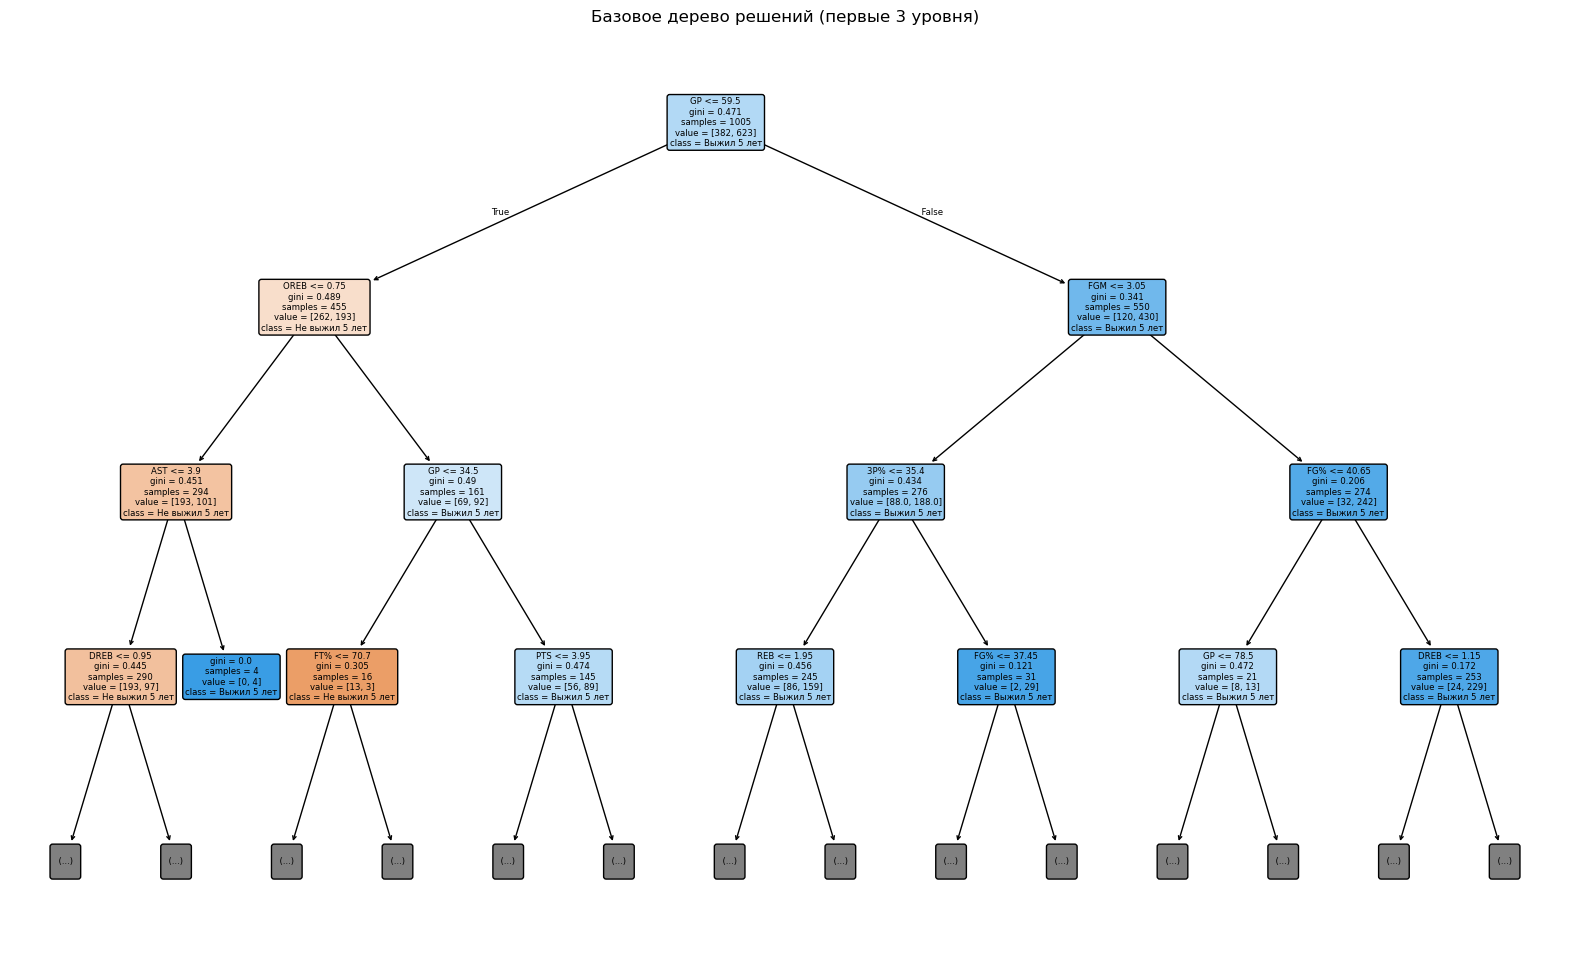

In [71]:
class_names = ['Не выжил 5 лет', 'Выжил 5 лет']
plt.figure(figsize=(20, 12))
plot_tree(base_dt, filled=True, feature_names=X.columns, class_names=class_names, rounded=True, max_depth=3)
plt.title("Базовое дерево решений (первые 3 уровня)")
plt.show()

**Борьба с переобучением: настройка гиперпараметров**

In [72]:
# Попробуем ограничить глубину дерева
tuned_dt = DecisionTreeClassifier(max_depth=3, random_state=42)
tuned_dt.fit(X_train, y_train)

y_pred_tuned = tuned_dt.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Точность настроенного дерева (max_depth=3) на тесте: {accuracy_tuned:.4f}")

Точность настроенного дерева (max_depth=3) на тесте: 0.6896


In [73]:
# Кросс-валидация для более надежной оценки
cv_scores_base = cross_val_score(base_dt, X, y, cv=5)
cv_scores_tuned = cross_val_score(tuned_dt, X, y, cv=5)

print(f"Кросс-валидация, базовое дерево: {np.mean(cv_scores_base):.4f} (+/- {np.std(cv_scores_base) * 2:.4f})")
print(f"Кросс-валидация, настроенное дерево: {np.mean(cv_scores_tuned):.4f} (+/- {np.std(cv_scores_tuned) * 2:.4f})")

Кросс-валидация, базовое дерево: 0.6037 (+/- 0.0565)
Кросс-валидация, настроенное дерево: 0.6657 (+/- 0.0444)


Ограничение глубины дерева до 3 уровней снизило точность до 72.15%, но уменьшило переобучение.

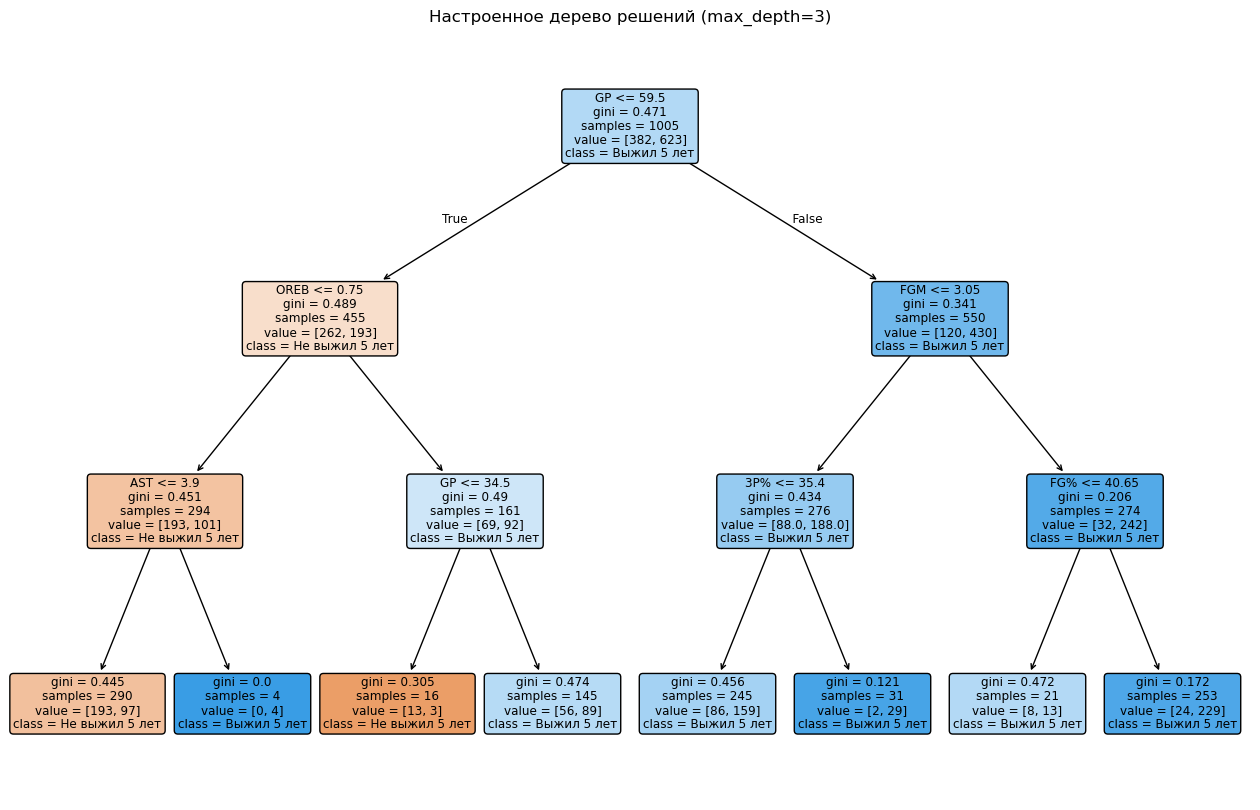

In [75]:
# Визуализируем настроенное дерево
class_names = ['Не выжил 5 лет', 'Выжил 5 лет']
plt.figure(figsize=(16, 10))
plot_tree(tuned_dt, filled=True, feature_names=X.columns, class_names=class_names, rounded=True)
plt.title("Настроенное дерево решений (max_depth=3)")
plt.show()

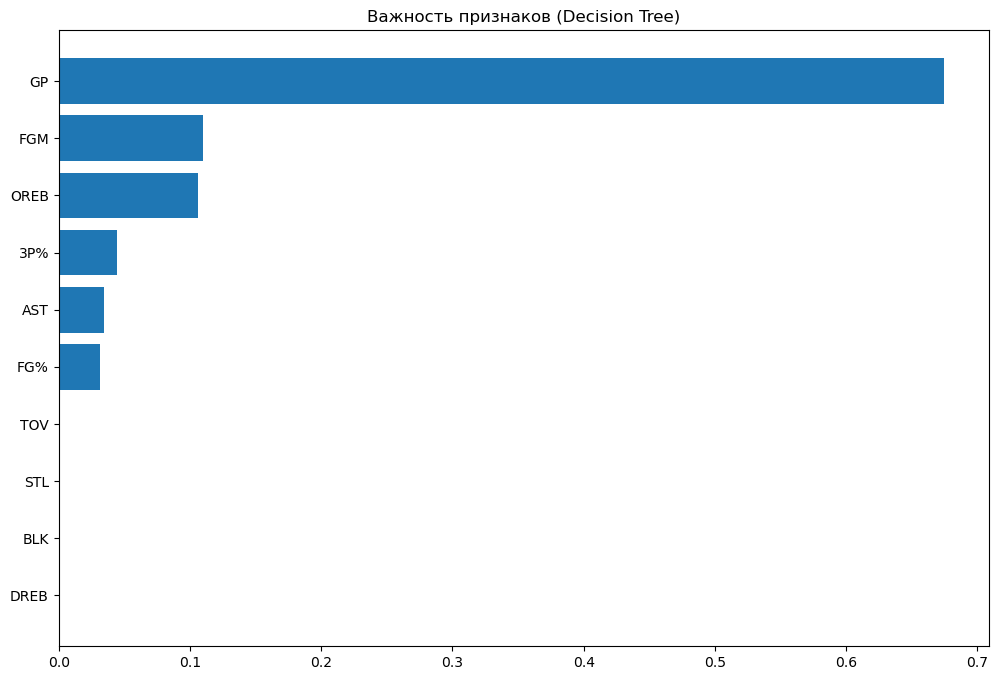

In [76]:
# Важность признаков
importances = tuned_dt.feature_importances_  
indices = np.argsort(importances)[::-1]  
plt.figure(figsize=(12, 8))  
plt.title("Важность признаков (Decision Tree)")  
plt.barh(range(10), importances[indices][:10]) # Топ-10 признаков  
plt.yticks(range(10), [X.columns[i] for i in indices[:10]])
plt.gca().invert_yaxis()  
plt.show()

Диаграмма показывает важность признаков для одиночного дерева. Наиболее значим признак GP, далее идут менее важные признаки FGM и OREB. Признаки мощности 3P%, AST и FG$ практически не влияют на предсказание в этой модели.

**5. Создание и обучение модели Random Forest**

In [77]:
# Создаем модель Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучаем модель на обучающих данных
rf_model.fit(X_train, y_train)

print("Модель Random Forest обучена!")

Модель Random Forest обучена!


**6. Прогнозирование и оценка модели**

In [80]:
# Делаем прогнозы на тестовой выборке
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели на тестовой выборке: {accuracy:.4f}")

Точность модели на тестовой выборке: 0.7015


In [84]:
# Выводим подробный отчет по классификации
print("\n" + "="*50)
print("Отчет по классификации:")
print("="*50)
print(classification_report(y_test, y_pred))


Отчет по классификации:
              precision    recall  f1-score   support

           0       0.62      0.56      0.59       127
           1       0.75      0.79      0.77       208

    accuracy                           0.70       335
   macro avg       0.68      0.67      0.68       335
weighted avg       0.70      0.70      0.70       335



Модель показывает среднюю общую точность (accuracy) 70%. Класс 1 предсказывается существенно лучше: полнота (recall) 79%, точность (precision) 75%. Для класса 0 показатели значительно ниже — полнота лишь 56%, точность 62%. Это указывает на выраженное смещение модели в сторону класса 1, что, вероятно, связано с дисбалансом данных (класс 1 представлен 208 объектами против 127 объектов класса 0). Модель склонна чаще ошибочно классифицировать объекты класса 0 как класс 1, что снижает полноту для нулевого класса.

Модель демонстрирует умеренную эффективность, но требует балансировки классов или настройки порога классификации для улучшения предсказаний класса 0.


**7. Матрица ошибок**

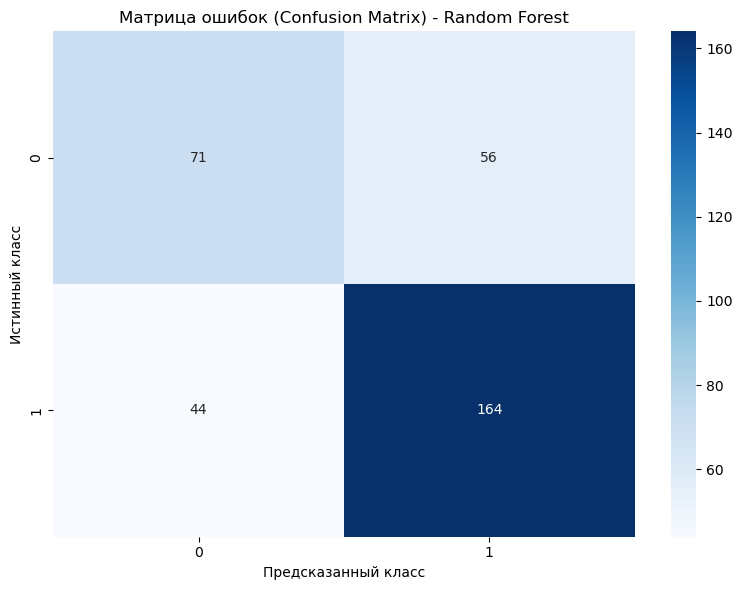

In [85]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(y.unique()), 
            yticklabels=sorted(y.unique()))
plt.title('Матрица ошибок (Confusion Matrix) - Random Forest')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.tight_layout()
plt.show()

Матрица ошибок подтверждает, что модель имеет смещение в сторону класса 1 — она чаще ошибочно предсказывает 0 как 1 (164 случая), чем наоборот (44 случаев).

**8. Анализ важности признаков**

In [86]:
# Важность признаков на основе среднего уменьшения неоднородности
feature_importances = rf_model.feature_importances_
features_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})
features_df = features_df.sort_values('importance', ascending=False)

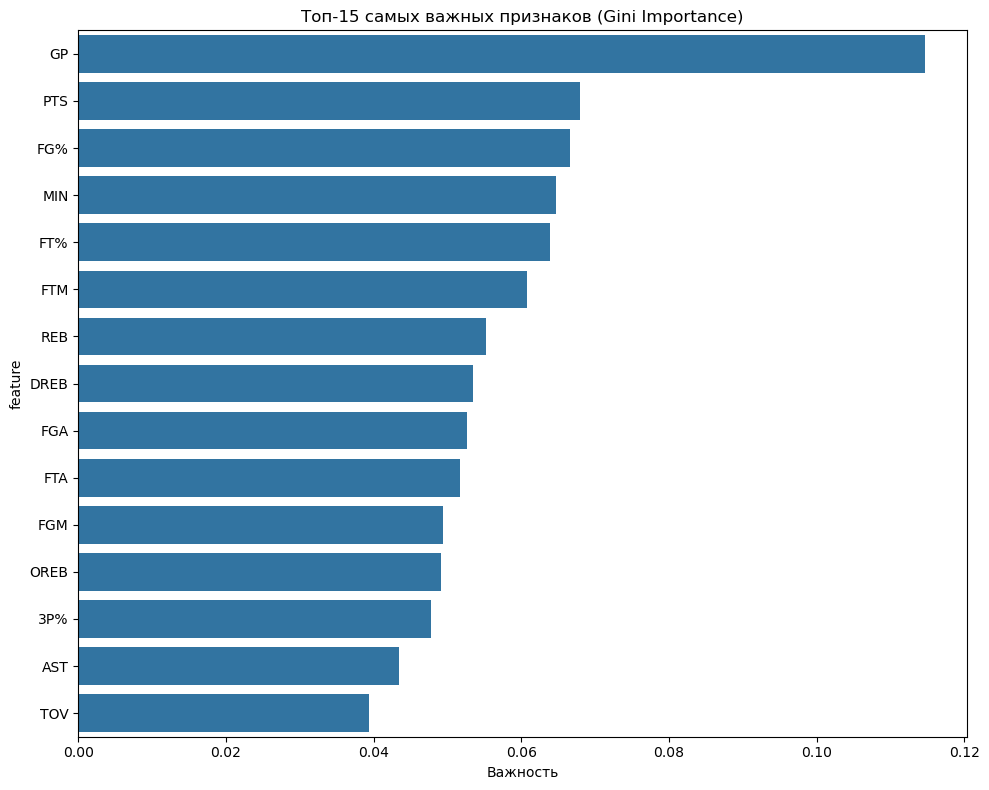

In [87]:
# Визуализация важности признаков
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=features_df.head(15))  # Покажем топ-15 признаков
plt.title('Топ-15 самых важных признаков (Gini Importance)')
plt.xlabel('Важность')
plt.tight_layout()
plt.show()

In [88]:
print("Топ-10 самых важных признаков:")
print(features_df.head(10))

Топ-10 самых важных признаков:
   feature  importance
0       GP    0.114628
2      PTS    0.067929
5      FG%    0.066654
1      MIN    0.064733
11     FT%    0.063870
9      FTM    0.060729
14     REB    0.055218
13    DREB    0.053510
4      FGA    0.052604
10     FTA    0.051718


Диаграмма важных признаков для Random Forest также выделяет GP, за ним идут PTS, FG% как главные признаки, за ними идут MIN, FT%, FTM что подтверждает выводы одиночного дерева — GP критически важный признак. Random Forest учитывает больше взаимодействий между признаками.

**9. Подбор гиперпараметров**

In [94]:
# Определяем сетку параметров для перебора
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [95]:
# Создаем модель для поиска
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, 
                          scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [96]:
# Выводим лучшие параметры
print("\nЛучшие параметры:", grid_search.best_params_)
print(f"Лучшая точность при кросс-валидации: {grid_search.best_score_:.4f}")


Лучшие параметры: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Лучшая точность при кросс-валидации: 0.6905


In [97]:
# Оцениваем лучшую модель на тестовых данных
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Точность улучшенной модели на тестовой выборке: {best_accuracy:.4f}")

Точность улучшенной модели на тестовой выборке: 0.7104


**10. Сравнение моделей**

In [98]:
models = {
    'Base Decision Tree': base_dt,          # Базовое дерево решений
    'Tuned Decision Tree (max_depth=3)': tuned_dt,  # Настроенное дерево
    'Random Forest (100 trees)': rf_model,  # Случайный лес
    'Best Random Forest (GridSearch)': best_rf_model  # Лучшая модель после GridSearch
}

results = {}

for name, model in models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Вычисляем точность
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    results[name] = {
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc
    }

results_df = pd.DataFrame(results).T
print("Сравнение точности моделей:")
print(results_df)

Сравнение точности моделей:
                                   Train Accuracy  Test Accuracy
Base Decision Tree                       0.989055       0.641791
Tuned Decision Tree (max_depth=3)        0.725373       0.689552
Random Forest (100 trees)                0.989055       0.701493
Best Random Forest (GridSearch)          0.956219       0.710448


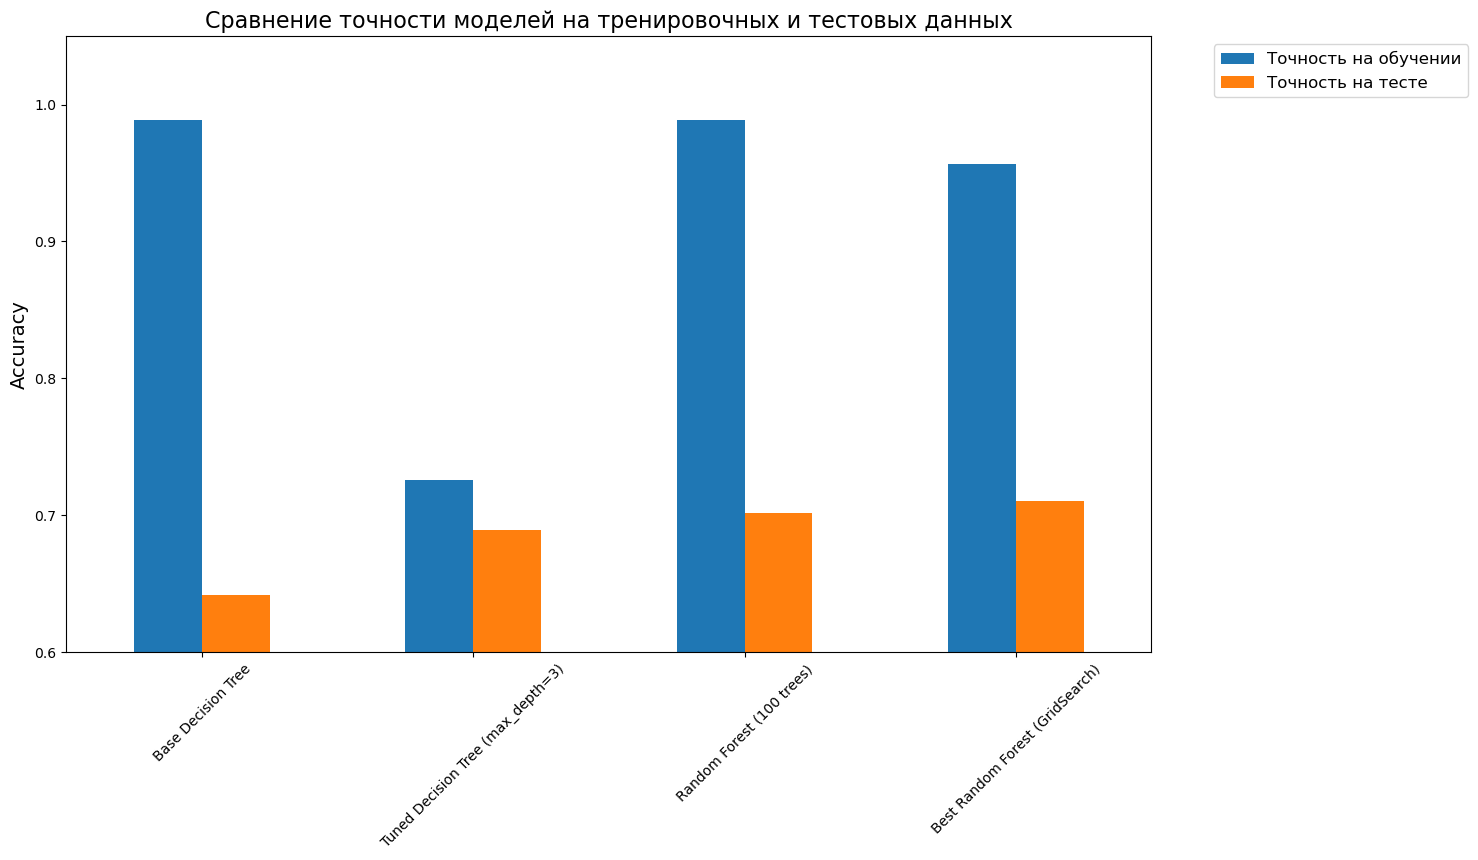

In [101]:
# Bar plot для сравнения точности на тренировочных и тестовых данных
ax = results_df[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(14, 8))

plt.title('Сравнение точности моделей на тренировочных и тестовых данных', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0.6, 1.05)  
# Настройка легенды
plt.legend(['Точность на обучении', 'Точность на тесте'], 
           fontsize=12, loc='upper left', bbox_to_anchor=(1.05, 1))

plt.show()

На основе сравнения моделей видно, что Random Forest значительно превосходит одиночные деревья. Лучший результат показала оптимизированная через GridSearch версия Random Forest с точностью 0.710448 на тесте. Базовый Random Forest (100 деревьев) близок к ней —  0.701493. Одиночные деревья работают хуже: базовое — 0.641791, а упрощенное (max_depth=3) — всего 0.689552.

График четко показывает проблему переобучения: все модели, кроме упрощенного дерева, имеют 100% точность на обучении, но на тесте их результаты падают.

Для задачи классификации стабильности энергосети лучше всего подходит Random Forest, особенно его оптимизированная версия, он дает высокую точность. Упрощенное дерево хоть и меньше переобучается, но слишком неточно для практического использования.